# Batch correction (two batches)

Here we will use two scRNA-seq mouse atlas datasets of different technologies as an example to illustrate how SIMBA performs scRNA-seq batch correction

In [1]:
import os
import simba as si
si.__version__

'1.0'

In [2]:
workdir = 'result_mouse_atlas'
si.settings.set_workdir(workdir)

Saving results in: result_mouse_atlas


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### load example data

In [5]:
# mirowell-seq data
adata_CG_mi = si.datasets.rna_han2018()


rna_han2018.h5ad: 0.00B [00:00, ?B/s]

rna_han2018.h5ad: 24.6MB [00:17, 1.45MB/s]                              


Downloaded to result_mouse_atlas/data.


In [6]:
# smart-seq data
adata_CG_sm = si.datasets.rna_tmc2018()


rna_tmc2018.h5ad: 0.00B [00:00, ?B/s]

rna_tmc2018.h5ad: 50.9MB [00:31, 1.60MB/s]                              

Downloaded to result_mouse_atlas/data.


In [7]:
adata_CG_mi

AnnData object with n_obs × n_vars = 4239 × 15006
    obs: 'nGene', 'nUMI', 'orig.ident', 'batch', 'ct', 'ct.orig', 'tissue', 'organ', 'percent.mito', 'batchlb', 'celltype'

In [8]:
adata_CG_sm

AnnData object with n_obs × n_vars = 2715 × 15006
    obs: 'nGene', 'nUMI', 'orig.ident', 'batch', 'ct', 'ct.orig', 'tissue', 'organ', 'percent.mito', 'batchlb', 'celltype'

## microwell-seq data

### preprocessing

In [9]:
si.pp.filter_genes(adata_CG_mi,min_n_cells=3)

Before filtering: 
4239 cells, 15006 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
4239 cells, 13662 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [10]:
si.pp.cal_qc_rna(adata_CG_mi)

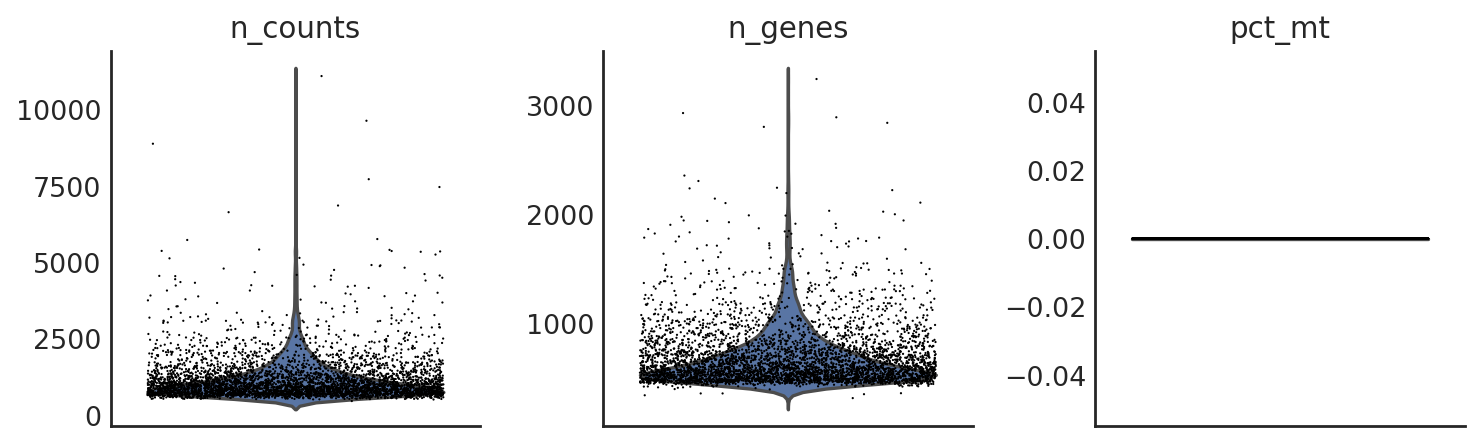

In [11]:
si.pl.violin(adata_CG_mi,list_obs=['n_counts','n_genes','pct_mt'])

In [12]:
si.pp.normalize(adata_CG_mi,method='lib_size')

In [13]:
si.pp.log_transform(adata_CG_mi)

In [14]:
si.pp.select_variable_genes(adata_CG_mi, n_top_genes=3000)

3000 variable genes are selected.


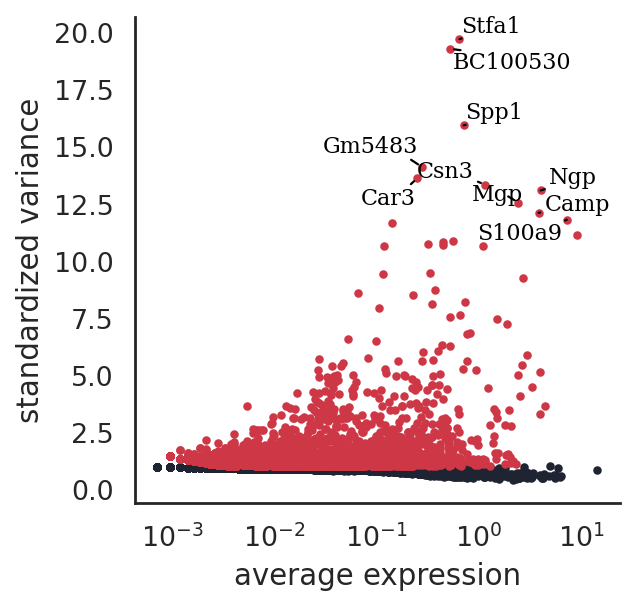

In [15]:
si.pl.variable_genes(adata_CG_mi,show_texts=True,)

### discretize RNA expression

[0.64202917 1.8883792  2.4364908  3.030551   3.853816   7.666325  ]


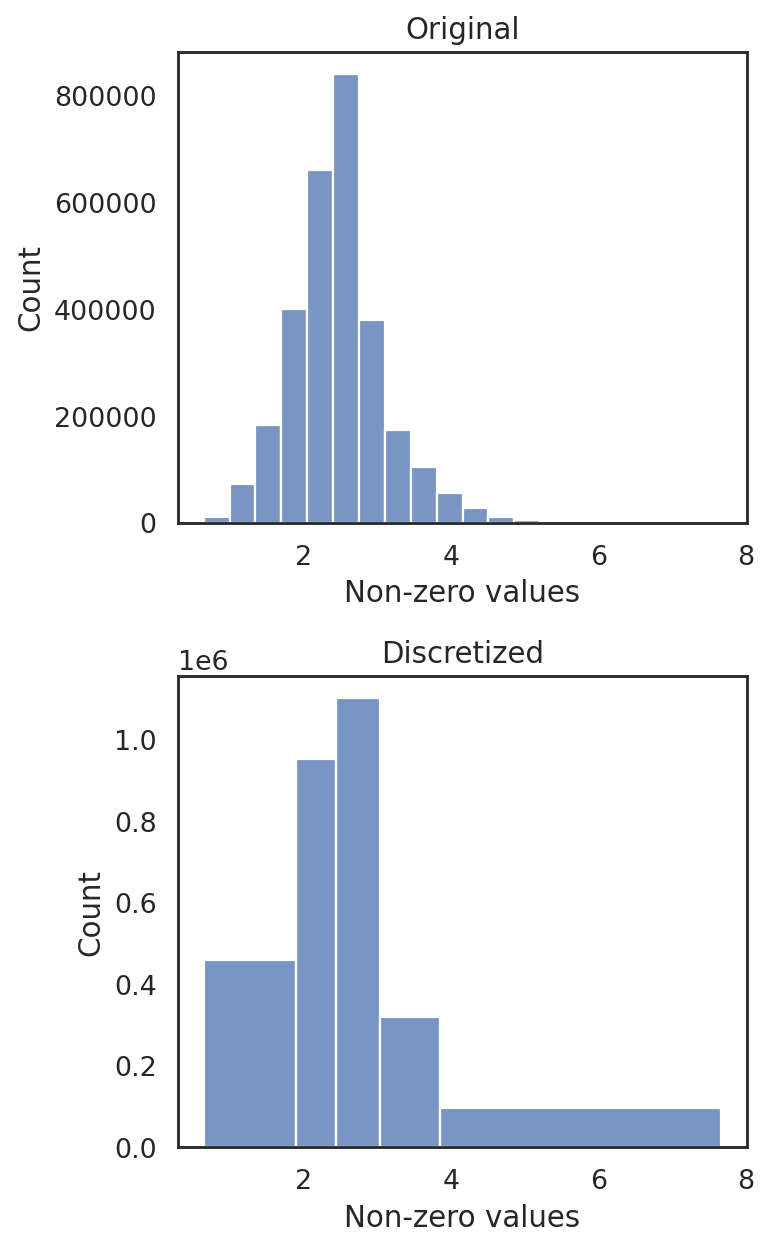

In [16]:
si.tl.discretize(adata_CG_mi,n_bins=5)
si.pl.discretize(adata_CG_mi,kde=False)

### smart-seq2 data

### preprocessing

In [17]:
si.pp.filter_genes(adata_CG_sm,min_n_cells=3)

Before filtering: 
2715 cells, 15006 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2715 cells, 14956 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [18]:
si.pp.cal_qc_rna(adata_CG_sm)

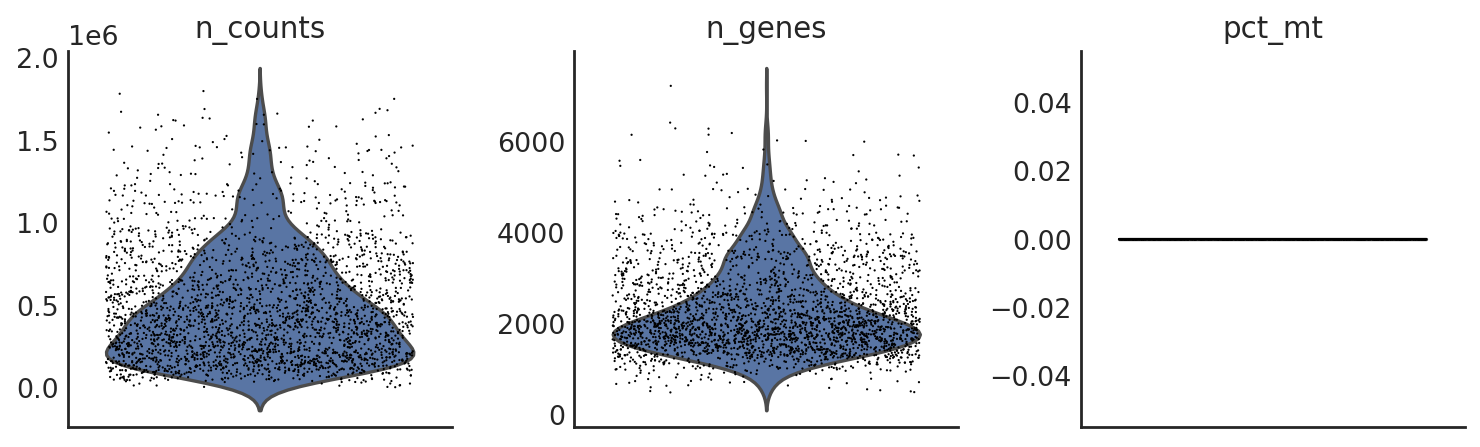

In [19]:
si.pl.violin(adata_CG_sm,list_obs=['n_counts','n_genes','pct_mt'])

In [20]:
si.pp.normalize(adata_CG_sm,method='lib_size')

In [21]:
si.pp.log_transform(adata_CG_sm)

In [22]:
si.pp.select_variable_genes(adata_CG_sm, n_top_genes=3000)

3000 variable genes are selected.


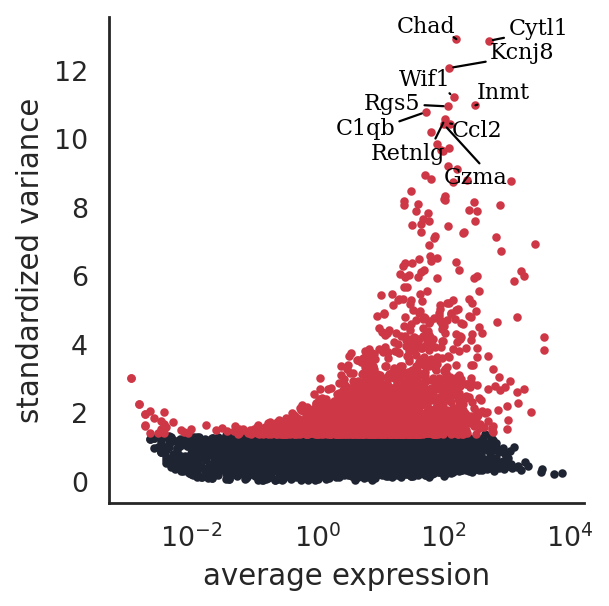

In [23]:
si.pl.variable_genes(adata_CG_sm,show_texts=True,)

### discretize RNA expression

[5.5492530e-03 5.2105367e-01 1.2380612e+00 2.0028372e+00 2.9648428e+00
 8.0040236e+00]


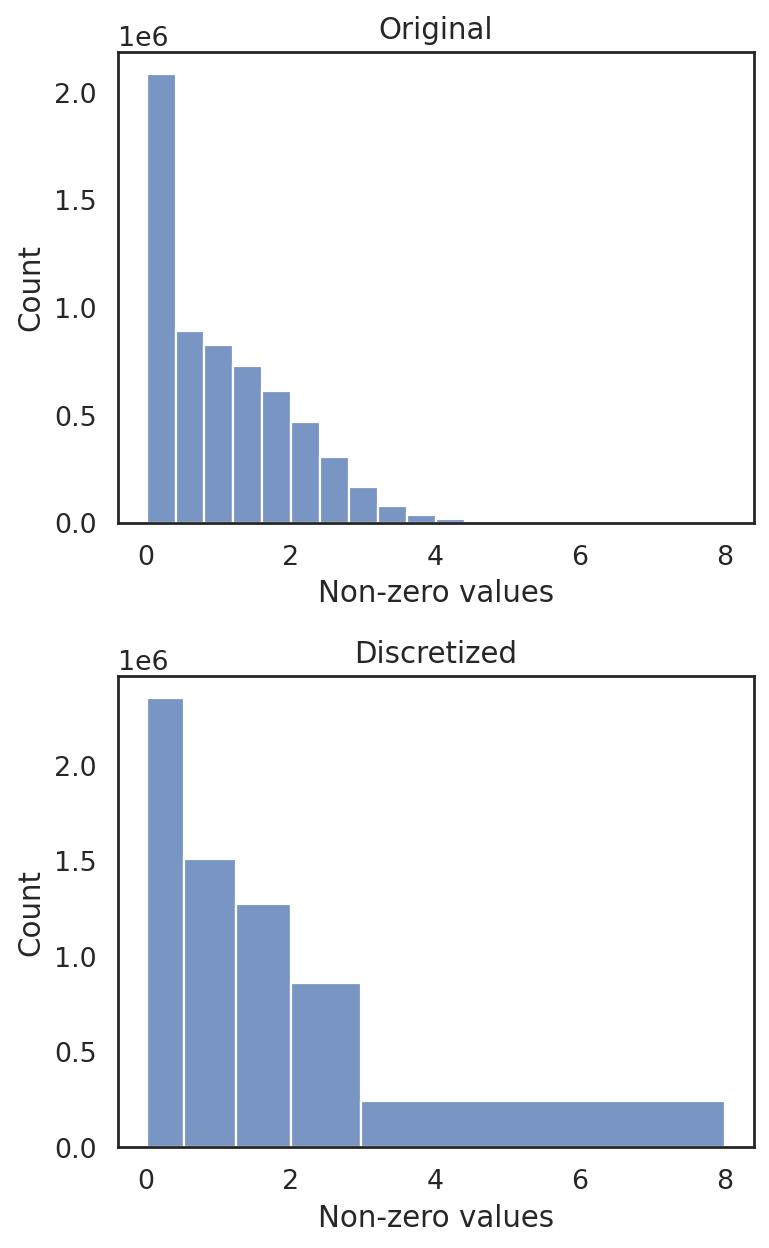

In [24]:
si.tl.discretize(adata_CG_sm,n_bins=5)
si.pl.discretize(adata_CG_sm,kde=False)

### infer edges between cells of different technologies

In [25]:
adata_CmiCsm = si.tl.infer_edges(adata_CG_mi, adata_CG_sm, n_components=20, k=20)

#shared features: 2969
Performing randomized SVD ...


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Searching for mutual nearest neighbors ...
27953 edges are selected


In [26]:
adata_CmiCsm

AnnData object with n_obs × n_vars = 4239 × 2715
    obs: 'nGene', 'nUMI', 'orig.ident', 'batch', 'ct', 'ct.orig', 'tissue', 'organ', 'percent.mito', 'batchlb', 'celltype', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'nGene', 'nUMI', 'orig.ident', 'batch', 'ct', 'ct.orig', 'tissue', 'organ', 'percent.mito', 'batchlb', 'celltype', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    obsm: 'svd'
    varm: 'svd'
    layers: 'conn'

#selected edges: 27953


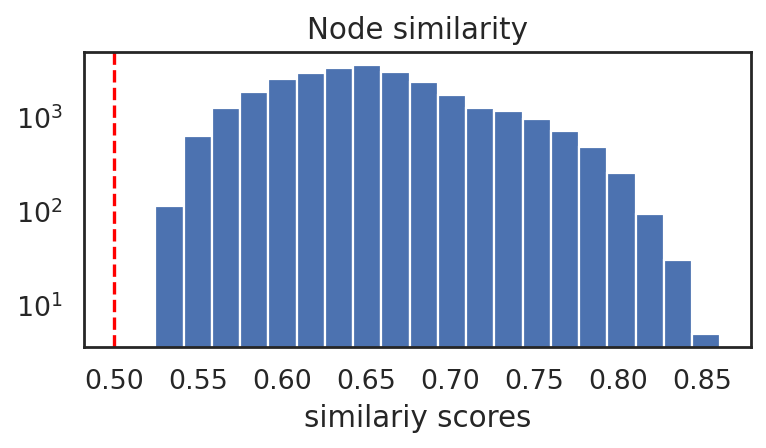

In [27]:
si.pl.node_similarity(adata_CmiCsm, cutoff=0.5)

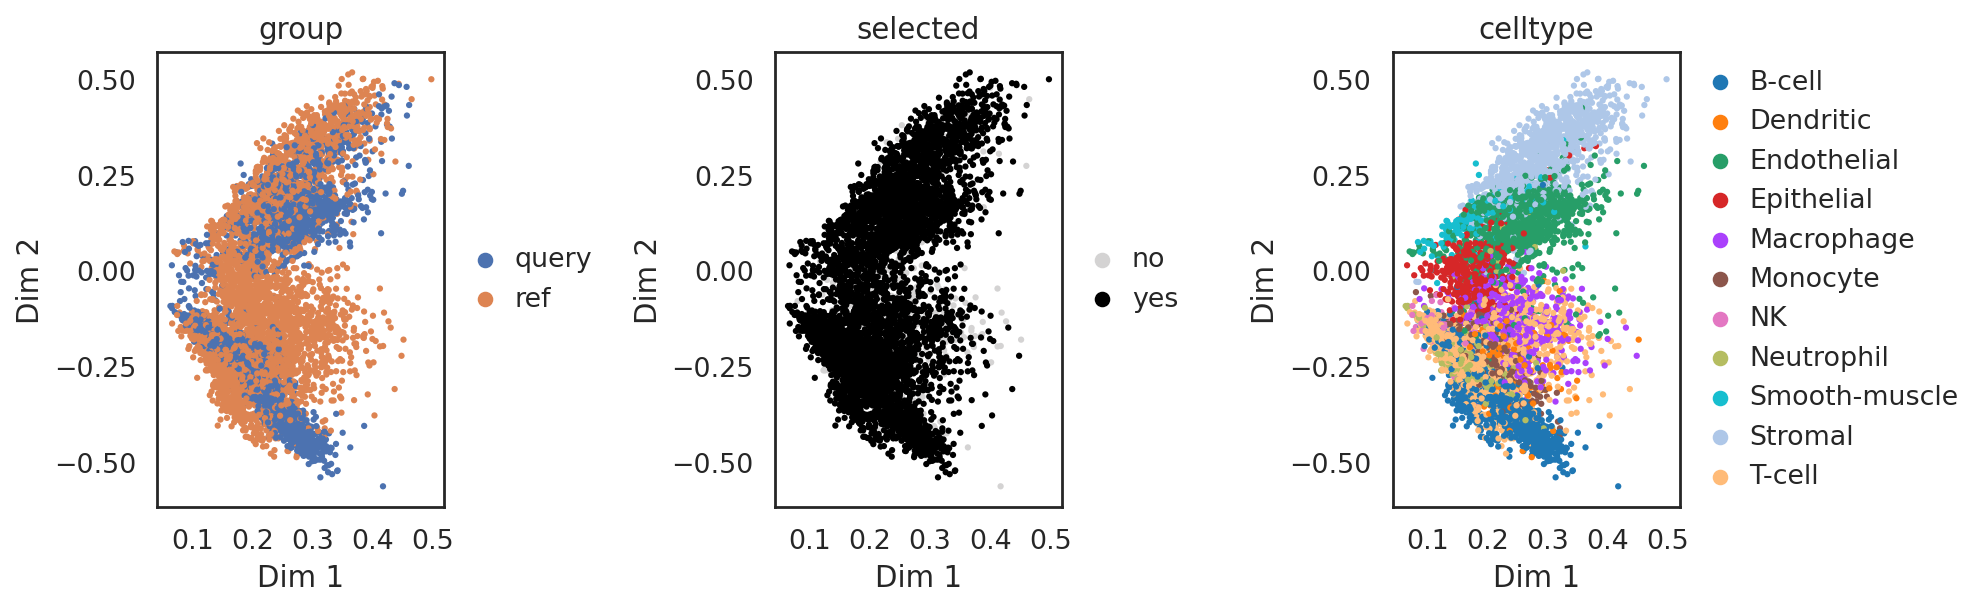

In [28]:
si.pl.svd_nodes(adata_CmiCsm,color=['celltype'],cutoff=0.5)

In [29]:
# edges can be futhere trimmed if needed. Here we keep all of them
si.tl.trim_edges(adata_CmiCsm, cutoff=0.5)

27953 edges are selected


### generate graph

In [30]:
si.tl.gen_graph(list_CG=[adata_CG_mi, adata_CG_sm],
                list_CC=[adata_CmiCsm],
                copy=False,
                use_highly_variable=True,
                dirname='graph0')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


relation0: source: C, destination: G
#edges: 67106
relation1: source: C, destination: G
#edges: 165204
relation2: source: C, destination: G
#edges: 208293
relation3: source: C, destination: G
#edges: 79190
relation4: source: C, destination: G
#edges: 30704
relation5: source: C2, destination: G
#edges: 289468
relation6: source: C2, destination: G
#edges: 130323
relation7: source: C2, destination: G
#edges: 137814
relation8: source: C2, destination: G
#edges: 138614
relation9: source: C2, destination: G
#edges: 77368
relation10: source: C, destination: C2
#edges: 27953
Total number of edges: 1352037
Writing graph file "pbg_graph.txt" to "result_mouse_atlas/pbg/graph0" ...
Finished.


### PBG training

Before PBG training, let’s take a look at the parameters:

In [31]:
si.settings.pbg_params

{'entity_path': 'result_mouse_atlas/pbg/graph0/input/entity',
 'edge_paths': ['result_mouse_atlas/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1},
  'C2': {'num_partitions': 1},
  'G': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'G',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0},
  {'name': 'r5', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 1.0},
  {'name': 'r6', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r7', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r8', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r9', 'lhs': 'C2

If no parameters need to be adjusted, the training can be simply done with:

```python
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')
```

Here we show how to adjust training-related parameters if needed. In general, weight decay `wd` is the only parameter that might need to be adjusted based on the following pbg metric plots. However, in almost all the cases, the automatically decided `wd` (enabling it by setting `auto_wd=True`) works well.

E.g. we want to change the number of cpus `workers`:

In [32]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
# dict_config['wd'] = 0.026209
dict_config['workers'] = 12

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

Auto-estimated weight decay is 0.026209
`.settings.pbg_params['wd']` has been updated to 0.026209
Converting input data ...
[2021-06-29 19:27:45.271681] Using the 11 relation types given in the config
[2021-06-29 19:27:45.272150] Searching for the entities in the edge files...
[2021-06-29 19:27:47.088293] Entity type C:
[2021-06-29 19:27:47.088849] - Found 4239 entities
[2021-06-29 19:27:47.089114] - Removing the ones with fewer than 1 occurrences...
[2021-06-29 19:27:47.089864] - Left with 4239 entities
[2021-06-29 19:27:47.090766] - Shuffling them...
[2021-06-29 19:27:47.093503] Entity type C2:
[2021-06-29 19:27:47.093749] - Found 2715 entities
[2021-06-29 19:27:47.093985] - Removing the ones with fewer than 1 occurrences...
[2021-06-29 19:27:47.094526] - Left with 2715 entities
[2021-06-29 19:27:47.094767] - Shuffling them...
[2021-06-29 19:27:47.096571] Entity type G:
[2021-06-29 19:27:47.096819] - Found 4620 entities
[2021-06-29 19:27:47.097059] - Removing the ones with fewer than

> If `wd` is specified by users instead of being automatically decided, then make sure to update it in simba setting:
```python
si.settings.pbg_params = dict_config.copy()
```

The trained result can be loaded in with the following steps:

By default, it's using the current training result stored in `.setting.pbg_params`
```python
# load in graph ('graph0') info
si.load_graph_stats()
# load in model info for ('graph0')
si.load_pbg_config()
```
Users can also specify different pathss
```python
# load in graph ('graph0') info
si.load_graph_stats(path='./result_mouse_atlas/pbg/graph0/')
# load in model info for ('graph0')
si.load_pbg_config(path='./result_mouse_atlas/pbg/graph0/model/')
```

Plotting training metrics to make sure the model is not overfitting

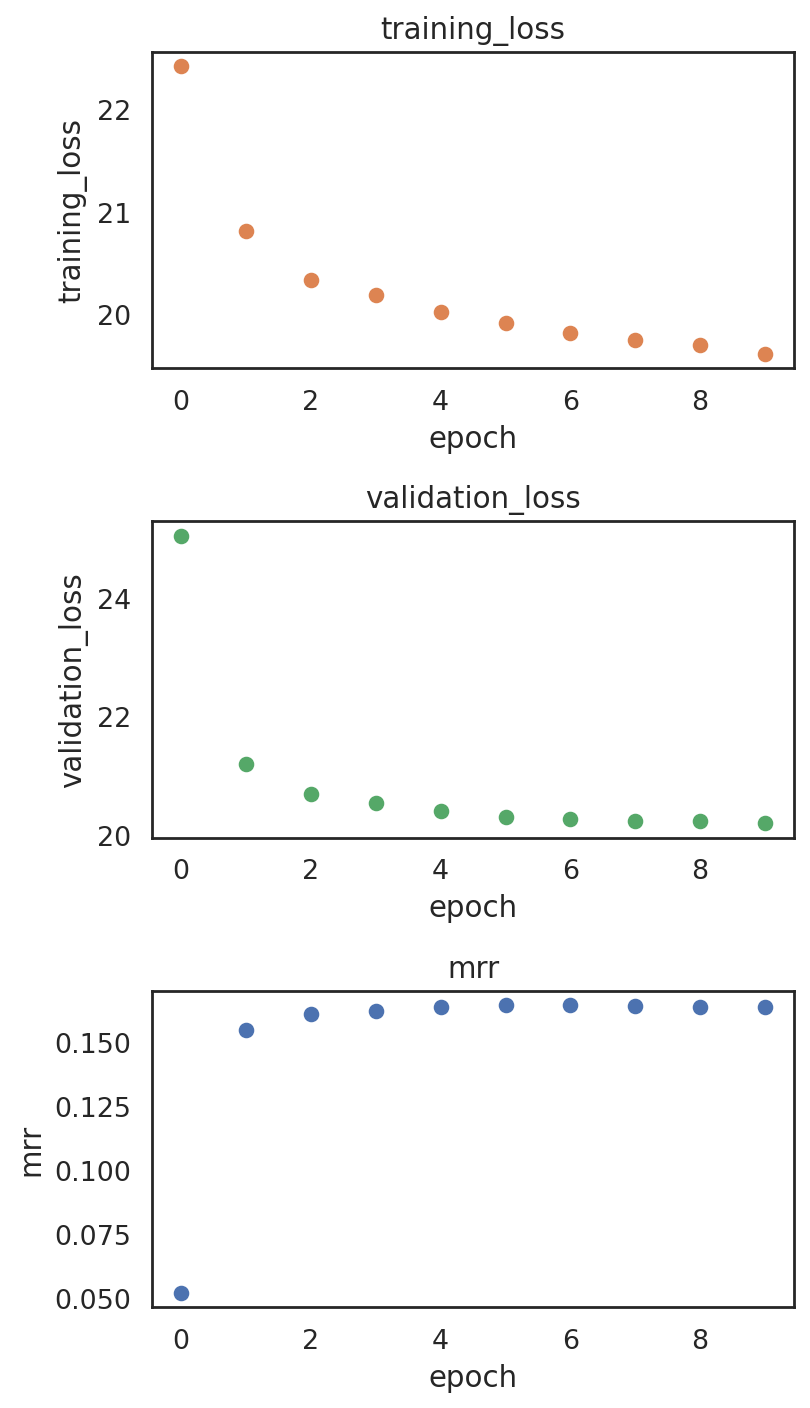

In [33]:
si.pl.pbg_metrics(fig_ncol=1)

### Post-training Analysis

In [34]:
dict_adata = si.read_embedding()

In [35]:
dict_adata

{'C': AnnData object with n_obs × n_vars = 4239 × 50,
 'C2': AnnData object with n_obs × n_vars = 2715 × 50,
 'G': AnnData object with n_obs × n_vars = 4620 × 50}

In [36]:
adata_C = dict_adata['C']  # embeddings for cells
adata_C2 = dict_adata['C2']  # embeddings for C2
adata_G = dict_adata['G']  # embeddings for genes

In [37]:
adata_C

AnnData object with n_obs × n_vars = 4239 × 50

In [38]:
adata_C2

AnnData object with n_obs × n_vars = 2715 × 50

In [39]:
adata_G

AnnData object with n_obs × n_vars = 4620 × 50

visualize embeddings of cells (microwell-seq)

In [40]:
## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG_mi[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

AnnData object with n_obs × n_vars = 4239 × 50
    obs: 'celltype'

In [41]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

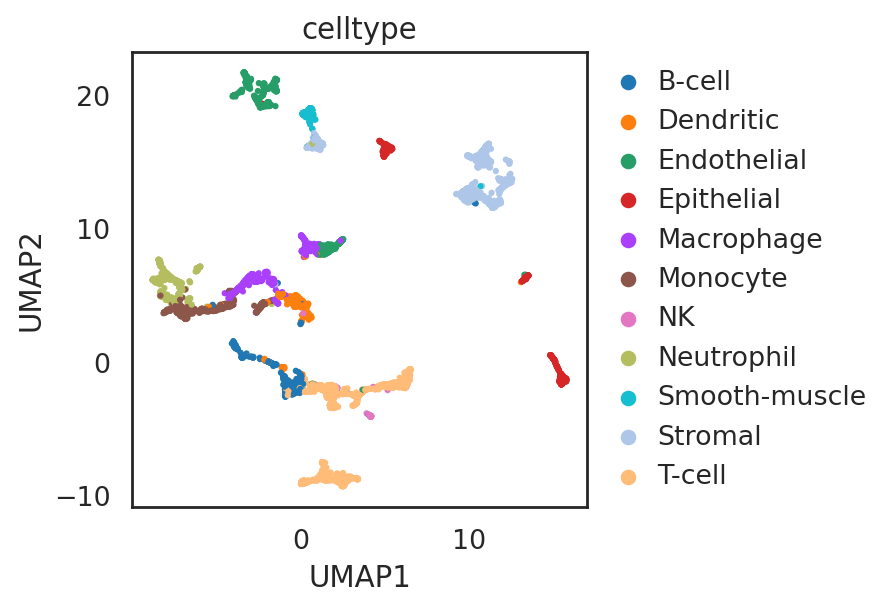

In [42]:
si.pl.umap(adata_C,
           color=['celltype'],
           fig_size=(5.5, 4),
           drawing_order='random')

visualize embeddings of cells (smart-seq2)

In [43]:
## Add annotation of celltypes (optional)
adata_C2.obs['celltype'] = adata_CG_sm[adata_C2.obs_names,:].obs['celltype'].copy()
adata_C2

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 2715 × 50
    obs: 'celltype'

In [44]:
si.tl.umap(adata_C2,n_neighbors=15,n_components=2)

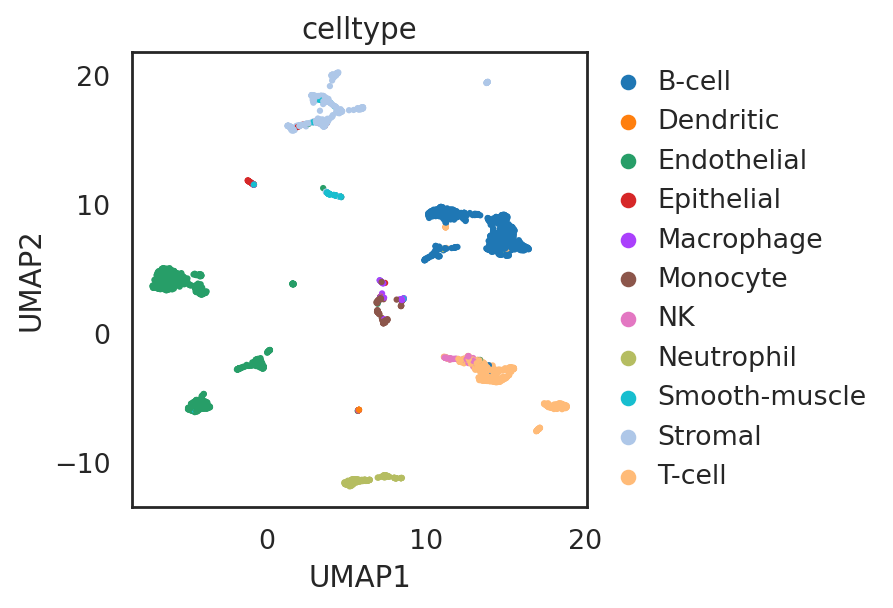

In [45]:
si.pl.umap(adata_C2,
           color=['celltype'],
           fig_size=(5.5, 4),
           drawing_order='random')

visualize co-embeddings of two batches

In [46]:
adata_all = si.tl.embed(adata_ref=adata_C,list_adata_query=[adata_C2])

Performing softmax transformation for query data 0;


In [47]:
## add annotations of two batches
adata_all.obs['entity_group'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_group'] = "Microwell-seq"
adata_all.obs.loc[adata_C2.obs_names, 'entity_group'] = "Smart-seq2"

adata_all.obs.head()

,celltype,id_dataset,entity_group
Stromal_Pancreas_1.AAGTACATTCCATCTACC,Stromal,ref,Microwell-seq
Neutrophil_FetalLiver_1.GCTGTGGAATTAACCTGA,Neutrophil,ref,Microwell-seq
Dendritic_Kidney_2.CCTAGACAAAGTGAGGAG,Dendritic,ref,Microwell-seq
Endothelial_Liver_1.TGAAGCCAACAAAACCTA,Endothelial,ref,Microwell-seq
Stromal_Pancreas_1.CCGCTATCTACCGGGTTT,Stromal,ref,Microwell-seq


In [48]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

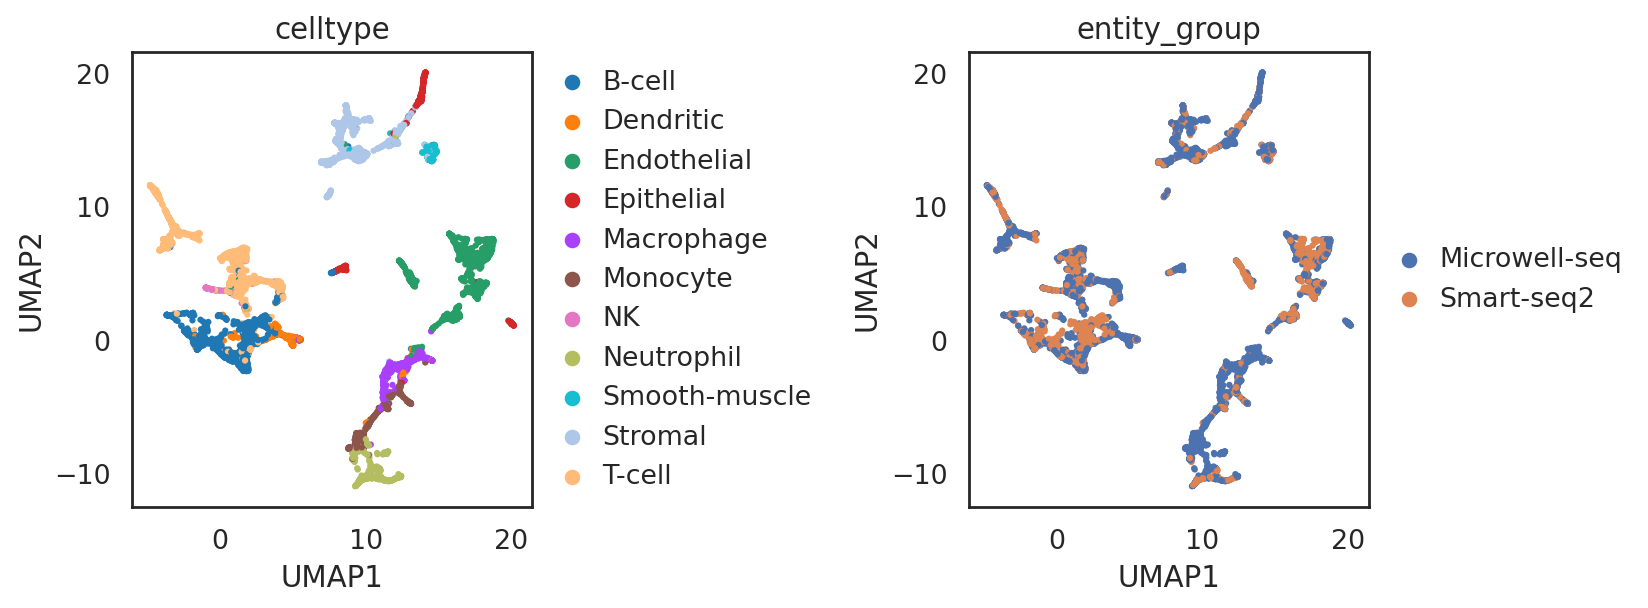

In [49]:
si.pl.umap(adata_all,color=['celltype','entity_group'],
           drawing_order='random',
           fig_size=(5,4))

visualize embeddings of cells and genes

In [50]:
adata_all_CG = si.tl.embed(adata_ref=adata_C,
                           list_adata_query=[adata_C2, adata_G],
                           use_precomputed=False)

Performing softmax transformation for query data 0;
Performing softmax transformation for query data 1;


In [51]:
## add annotations of all entities
adata_all_CG.obs['entity_anno'] = ""
adata_all_CG.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_C2.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C2.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'

adata_all_CG.obs.head()

,celltype,id_dataset,entity_anno
Stromal_Pancreas_1.AAGTACATTCCATCTACC,Stromal,ref,Stromal
Neutrophil_FetalLiver_1.GCTGTGGAATTAACCTGA,Neutrophil,ref,Neutrophil
Dendritic_Kidney_2.CCTAGACAAAGTGAGGAG,Dendritic,ref,Dendritic
Endothelial_Liver_1.TGAAGCCAACAAAACCTA,Endothelial,ref,Endothelial
Stromal_Pancreas_1.CCGCTATCTACCGGGTTT,Stromal,ref,Stromal


In [52]:
si.tl.umap(adata_all_CG,n_neighbors=15,n_components=2)

In [53]:
palette_celltype = {'B-cell': '#1f77b4',
 'Dendritic': '#ff7f0e',
 'Endothelial': '#279e68',
 'Epithelial': '#d62728',
 'Macrophage': '#aa40fc',
 'Monocyte': '#8c564b',
 'NK': '#e377c2',
 'Neutrophil': '#b5bd61',
 'Smooth-muscle': '#17becf',
 'Stromal': '#aec7e8',
 'T-cell': '#ffbb78'}

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"

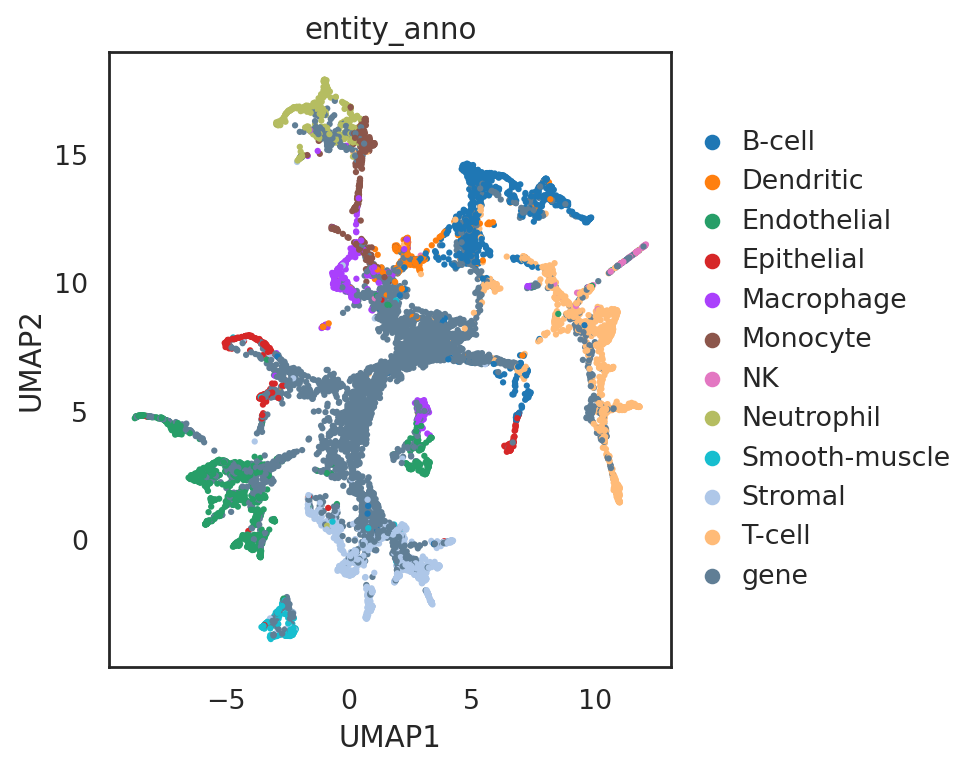

In [54]:
si.pl.umap(adata_all_CG,
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='random',
           fig_size=(6,5))

In [55]:
# find neighbor genes of given pins
query_genes = si.tl.query(adata_all_CG,
                          pin=[-4.5, 2.5],
                          use_radius=True, r=2,
                          obsm='X_umap',
                          anno_filter='entity_anno',
                          filters=['gene'])
print(query_genes.shape)
query_genes.head()

(293, 5)


,celltype,id_dataset,entity_anno,distance,query
Lrrc3b,nan,query_1,gene,0.112733,0
Myct1,nan,query_1,gene,0.143353,0
1810011O10Rik,nan,query_1,gene,0.145927,0
Tie1,nan,query_1,gene,0.163501,0
Sox18,nan,query_1,gene,0.167731,0


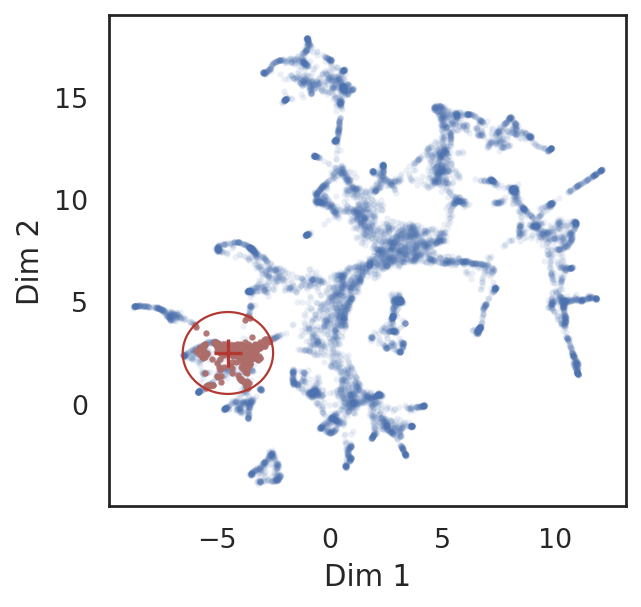

In [56]:
# show locations of pin points and its neighbor genes 
si.pl.query(adata_all_CG,
            show_texts=False,
            alpha=0.9,
            alpha_bg=0.1,
            fig_legend_ncol=1,
            fig_size=(4,4))

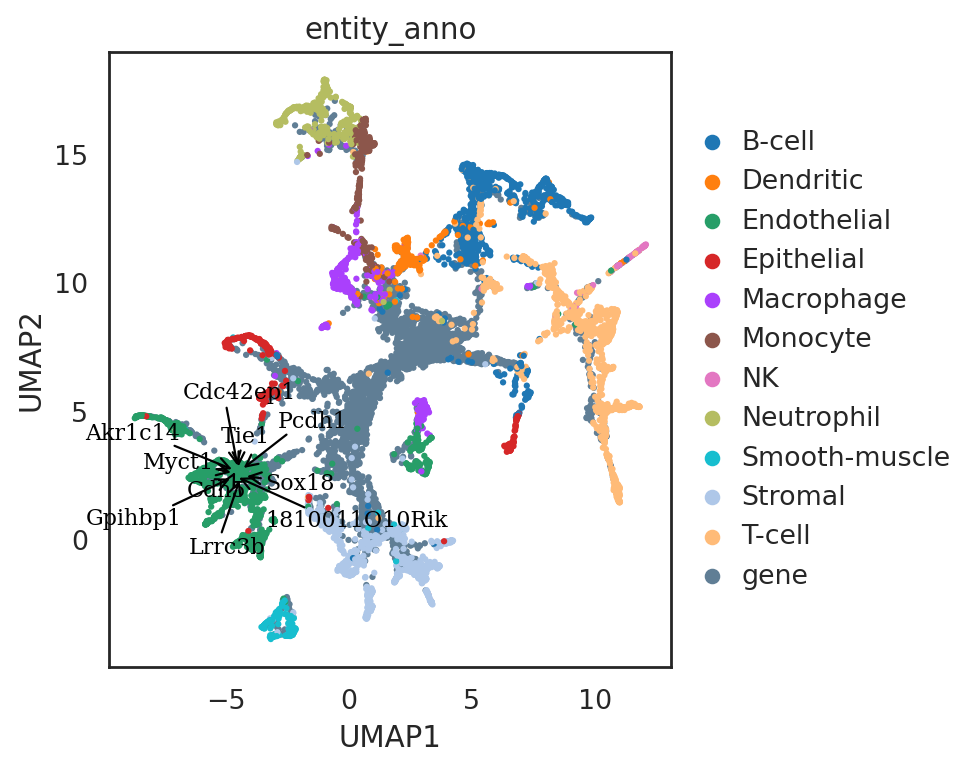

In [57]:
si.pl.umap(adata_all_CG[::-1],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           show_texts=True,
           texts=query_genes.index[:10],
           text_expand=(1.2,1.4),
           fig_size=(6,5),
           fig_legend_ncol=1)

visualize these neighbor genes on UMAP of cells

In [58]:
import numpy as np
adata_CG_concat = adata_CG_mi.concatenate([adata_CG_sm],
                                          join='outer',
                                          fill_value=np.nan,
                                          index_unique=None)
adata_CG_concat.obsm['X_umap'] = adata_all[adata_CG_concat.obs_names,].obsm['X_umap'].copy()

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


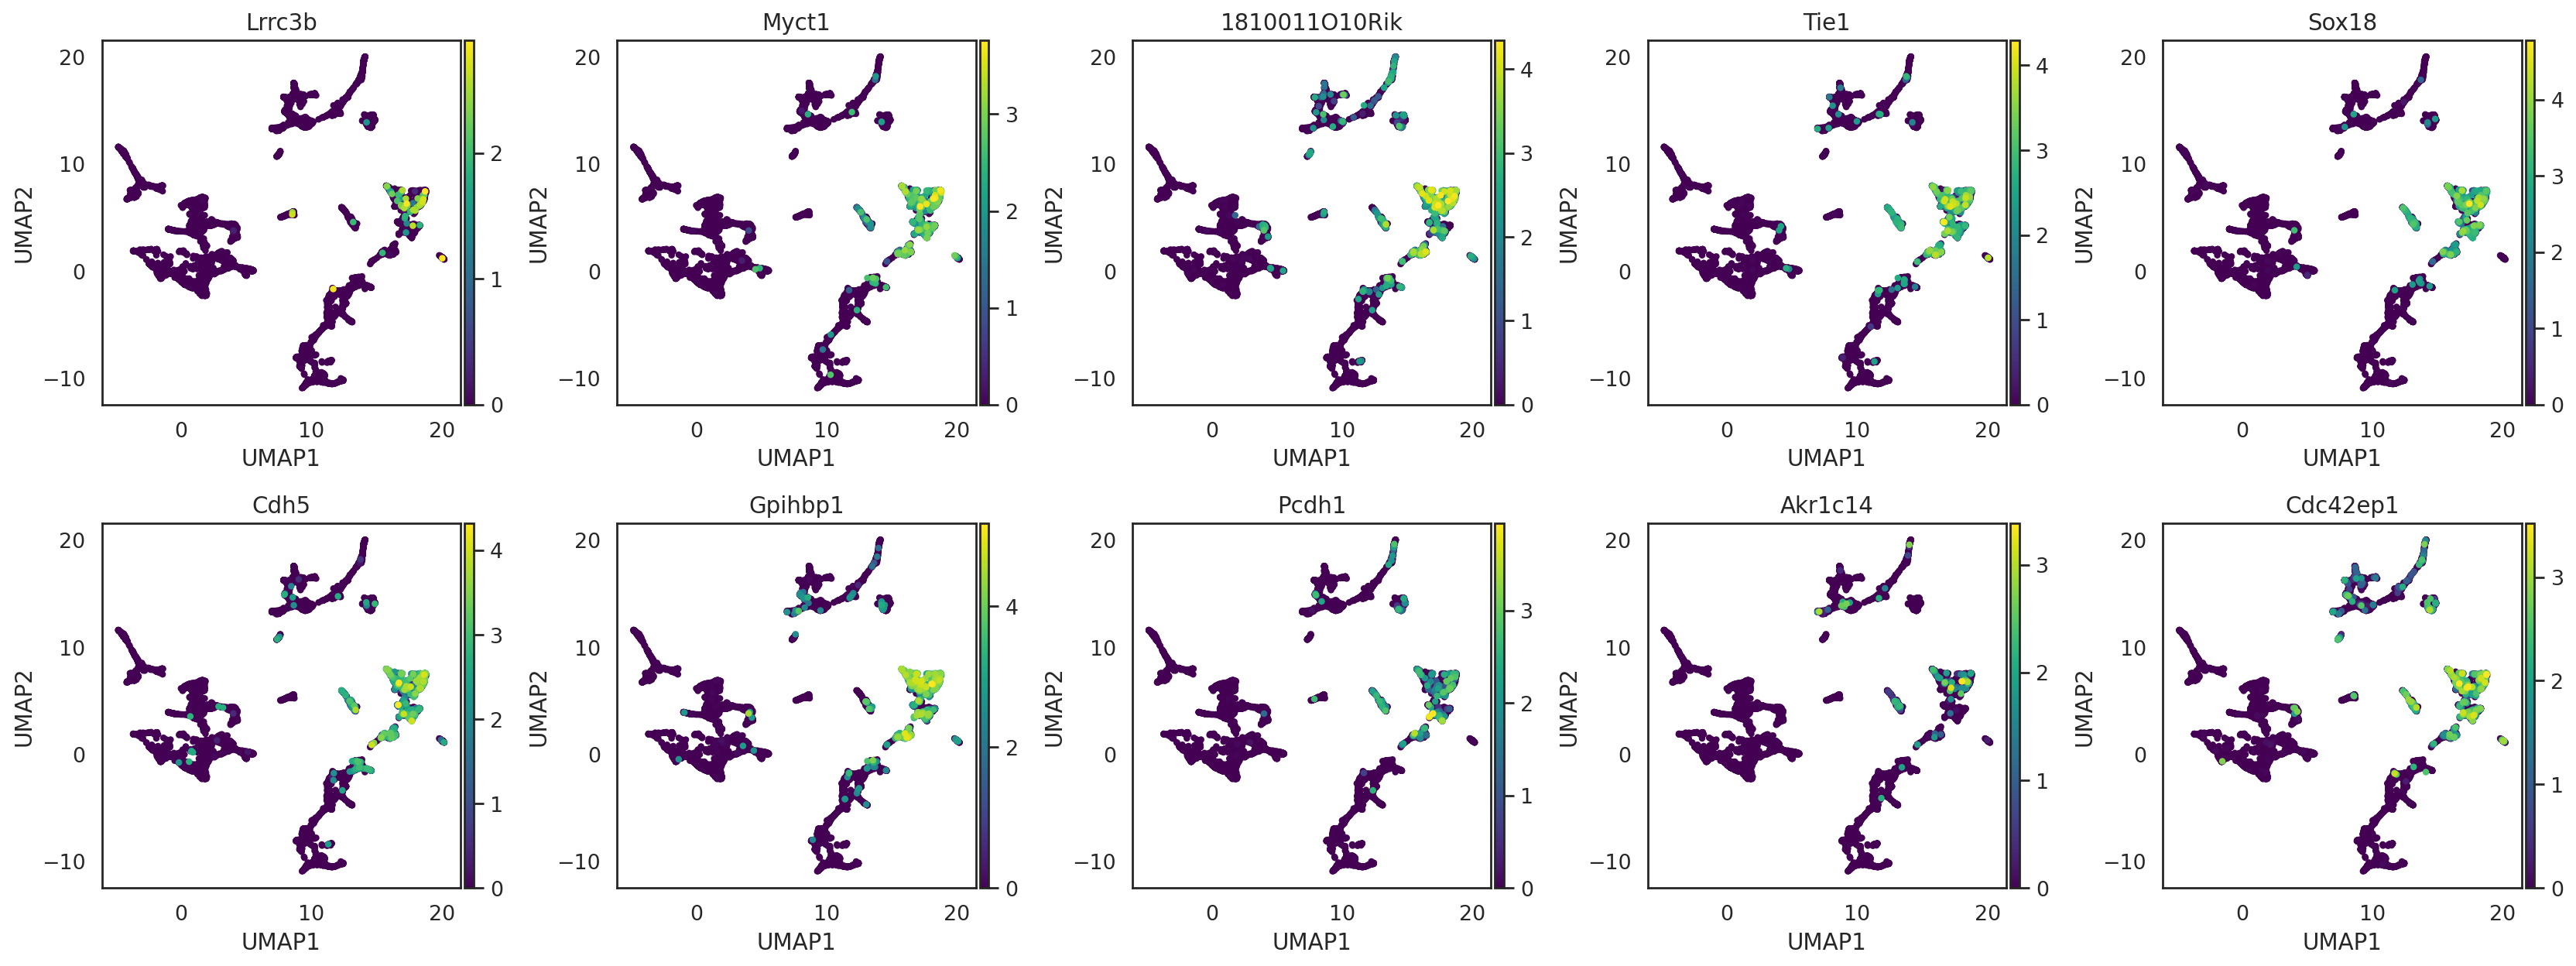

In [59]:
si.pl.umap(adata_CG_concat,
           color=query_genes.index[:10],
           drawing_order='sorted',
           fig_ncol=5,
           fig_size=(4,4))

### save results

In [60]:
adata_CG_mi.write(os.path.join(workdir,'adata_CG_mi.h5ad'))
adata_CG_sm.write(os.path.join(workdir,'adata_CG_sm.h5ad'))

adata_C.write(os.path.join(workdir,'adata_C.h5ad'))
adata_C2.write(os.path.join(workdir,'adata_C2.h5ad'))
adata_G.write(os.path.join(workdir,'adata_G.h5ad'))

adata_all.write(os.path.join(workdir,'adata_all.h5ad'))
adata_all_CG.write(os.path.join(workdir,'adata_all_CG.h5ad'))

Read back anndata objects

```python
adata_CG_mi = si.read_h5ad(os.path.join(workdir,'adata_CG_mi.h5ad'))
adata_CG_sm = si.read_h5ad(os.path.join(workdir,'adata_CG_sm.h5ad'))

adata_C = si.read_h5ad(os.path.join(workdir,'adata_C.h5ad'))
adata_C2 = si.read_h5ad(os.path.join(workdir,'adata_C2.h5ad'))
adata_G = si.read_h5ad(os.path.join(workdir,'adata_G.h5ad'))

adata_all = si.read_h5ad(os.path.join(workdir,'adata_all.h5ad'))
adata_all_CG = si.read_h5ad(os.path.join(workdir,'adata_all_CG.h5ad'))
```